In [3]:
import torch
import seaborn as sns
sns.set_theme(style="darkgrid")

In [4]:
t_c = torch.tensor([0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]) # in celcius
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]) # in unknown unit

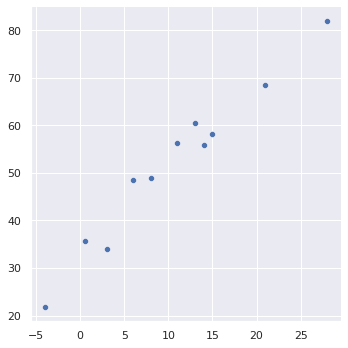

In [5]:
# We want a scatter plot. The relational plot function is more general, and uses a scatter plot as default
sns.relplot(x=t_c, y=t_u)

<AxesSubplot:>

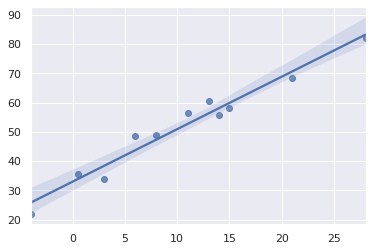

In [6]:
# plotting the regression line along with a 95% confidence interval
# for some reason, doesn't work well with tensors
sns.regplot(x=t_c.numpy(), y=t_u.numpy())

We'll assume a linear model at first.
`t_c = w * t_u + b`

analogous to
`y = mx + c`

but the slope is called the weight, and the intercept is called the bias

In [7]:
# define the model
def model(t_u, w, b):
    return t_u * w + b

def loss_fn(t_u, t_p):
    sq_diff = (t_u - t_p)**2 # this is a tensor, we need a mean to get a single number 
    return sq_diff.mean() # mean square loss


loss 2.9276463985443115 dw -9.822845458984375e-05, db 0.0006138194585219026
w 5.367083549499512 b -17.30118751525879


<AxesSubplot:>

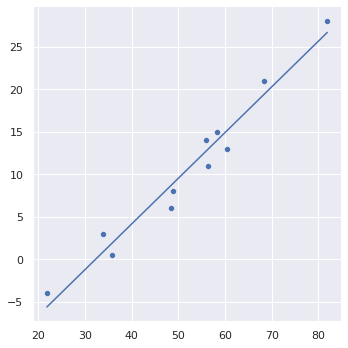

In [82]:

w = torch.ones(()) # just tensor(0.)
b = torch.zeros(())
R = 1e-2 # learning rate

t_u_normalized = t_u/10 # Have input be scaled down. Helps with model convergence.
for i in range(5000):
    predicted = model(t_u_normalized, w, b)
    loss = loss_fn(t_c, predicted)
    derivative_weight = -2*((t_u_normalized*(t_c-predicted)).mean())
    derivative_bias = -2*((t_c-predicted).mean())
    # update w and b, take step with respect to the gradient at that point
    w = w - (derivative_weight*R)
    b = b - (derivative_bias*R)

print(f"loss {loss} dw {derivative_weight}, db {derivative_bias}")
print(f"w {w} b {b}")


sns.relplot(x=t_u, y=t_c)
sns.lineplot(x=t_u, y=model(t_u_normalized, w, b)) # only model takes normalized input
